# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [23]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

Import project files

In [25]:
#import sys
#sys.path.append("utils")
# from utils import models

In [26]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uploading data

In [27]:
train_file = 'data/df_filtered_1000.csv'
output_name = '1000_example.csv'

Getting dataframe

In [28]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 266 ms
Wall time: 274 ms


## 1+2) Lemmatizing and protecting stopwords

Defininig the protected word list

In [29]:
wide_stop_words = False
if wide_stop_words:
    nlp_utils.add_word_list_to_stop_words('data/1000_most_common_words.txt')
else:
    nlp_utils.stopword_list = nlp_utils.stopwords.words('english')
print('Number of protected words:', len(nlp_utils.stopword_list))
print(nlp_utils.stopword_list[:10])

Number of protected words: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


Defining the word dictionary

In [30]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 19 s
Wall time: 19.9 s


In [31]:
print('Number of different words:', len(word_dict))

Number of different words: 3281


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Embedding the word list

In [32]:
embedded_dict = cluster_utils.embed_corpus(word_list)

Clustering

eps 1.7651676497117053
CPU times: total: 1.67 s
Wall time: 961 ms


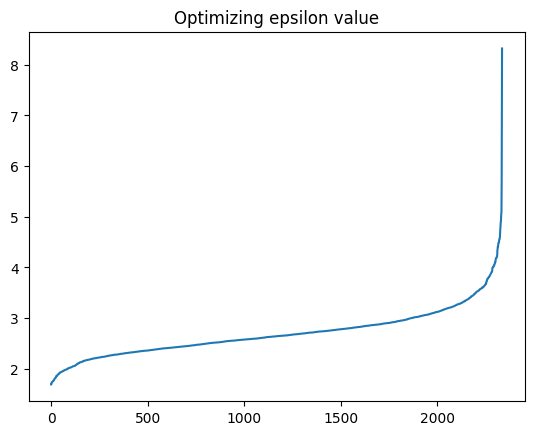

In [33]:
%%time

cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [34]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

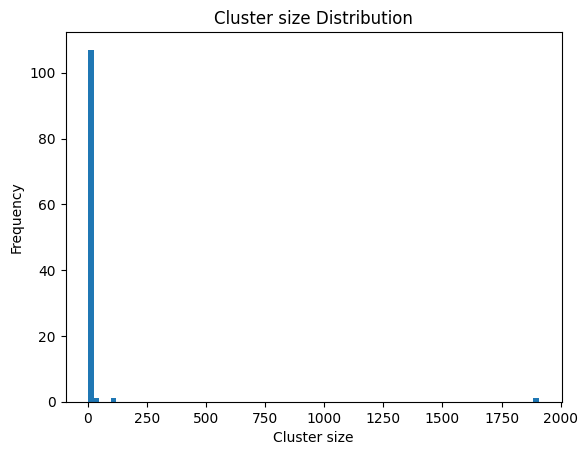

In [35]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

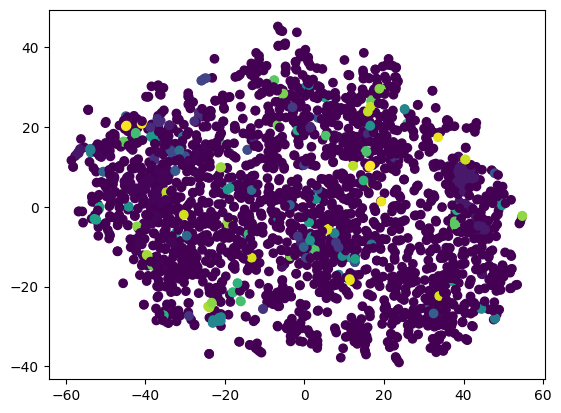

CPU times: total: 1min 11s
Wall time: 21.9 s


In [36]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.053744078


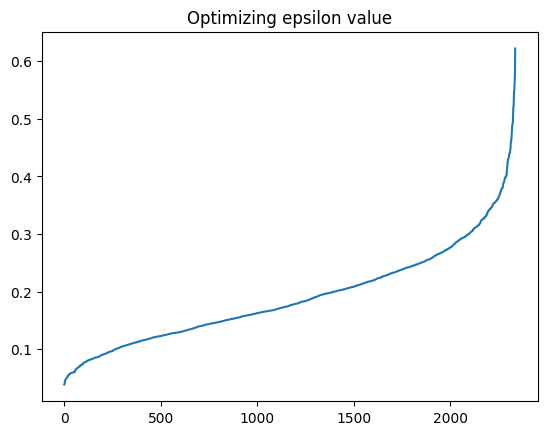

In [37]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

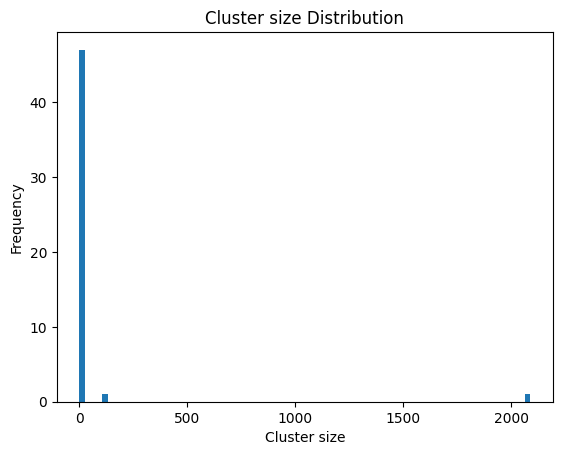

In [38]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

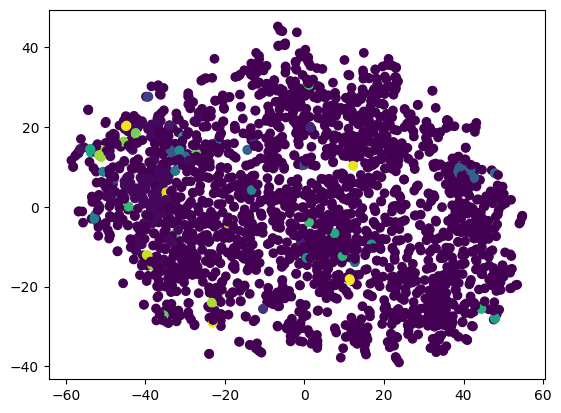

CPU times: total: 1min 11s
Wall time: 26 s


In [39]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [40]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

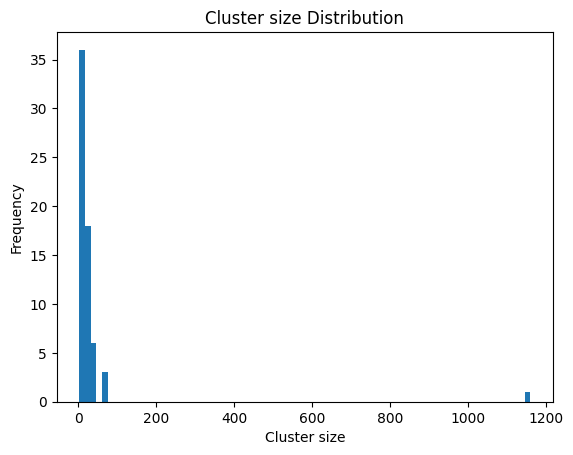

In [41]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

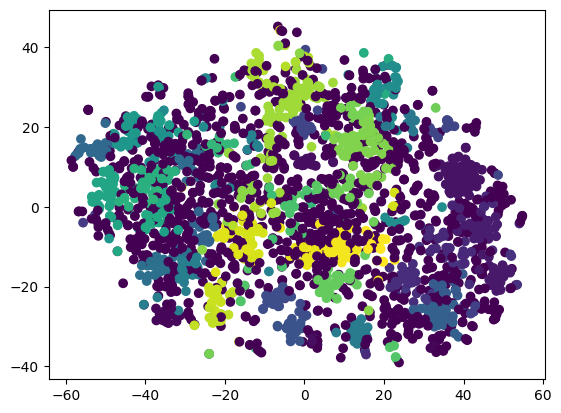

In [42]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [43]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 110 clusters
Cosine distance:	 49 clusters
HDBSCAN clustering:	 64 clusters


Plotting Jaccard index histogram

In [44]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['banana', 'love', 'chocolate', 'cola', 'hi']

Getting distance threshold

In [46]:
# threshold = cluster_utils.define_max_threshold()
threshold = None

### 3.2) Replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [47]:
######################### TEMP #######################
#df = df[:30]

In [48]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

Starting average Jaccard index: 0.18490998931057948
Distance threshold: None
distance: 0.32809252 	replacing ['possibly', 'totally', 'definitely', 'four', 'enough', 'queen', 'yes', 'let', 'everything', 'well', 'necessary', 'mess', 'nothing', 'three', 'swear', 'five', 'apparently', 'talk', 'lady', 'rather', 'yeah', 'life', 'seriously', 'perhaps', 'much', 'might', 'pretty', 'damn', 'probably', 'though', 'could', 'although', 'matter', 'basically', 'still', 'obviously', 'understand', 'forget', 'especially', 'guess', 'side', 'wrong', 'look', 'however', 'bad', 'way', 'yet', 'always', 'find', 'certainly', 'hit', 'run', 'otherwise', 'really', 'give', 'unfortunately', 'high', 'tell', 'kid', 'many', 'catch', 'hold', 'princess', 'mean', 'exactly', 'make', 'old', 'know', 'need', 'wonder', 'absolutely', 'see', 'take', 'step', 'two', 'right', 'bring', 'leave', 'maybe', 'either', 'wow', 'would', 'anyone', 'jump', 'anyway', 'prince', 'sure', 'reason', 'hell', 'remind', 'get', 'fly', 'hope', 'anything'

In [49]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",1,6,11,4
1,461,just awful: this was possibly the worst book i...,0,25,just worse : this was there the there book i h...,(just) [worse] (this) (was) [there] (the) {bad...,2,3,14,6
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,1,4,10,6
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size there there small , it bag up ...","pass: (the) {size} [there] [there] small, (it)...",5,5,11,4
...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct secret ....,excellent: prompt delivery. correct {part} (yo...,2,5,9,8
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....,2,4,11,8
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...,1,2,13,12
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : there the movie so i free it ...,video purchase: [there] (the) movie (so) (i) {...,2,2,7,7


#### 3.2.2) Based on Cosine distance

In [50]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

Starting average Jaccard index: 0.18147864872826147
Distance threshold: None
distance: 0.32705247 	replacing ['possibly', 'totally', 'definitely', 'four', 'enough', 'let', 'everything', 'well', 'nothing', 'three', 'swear', 'ever', 'five', 'apparently', 'thing', 'talk', 'explain', 'rather', 'life', 'seriously', 'perhaps', 'much', 'might', 'pretty', 'try', 'damn', 'good', 'probably', 'though', 'could', 'although', 'go', 'since', 'second', 'matter', 'yesterday', 'basically', 'still', 'dumb', 'obviously', 'understand', 'forget', 'especially', 'guess', 'wrong', 'look', 'however', 'bad', 'say', 'way', 'yet', 'always', 'find', 'certainly', 'every', 'anymore', 'call', 'almost', 'otherwise', 'really', 'give', 'unfortunately', 'never', 'tell', 'finally', 'many', 'last', 'mean', 'exactly', 'make', 'know', 'need', 'already', 'wonder', 'absolutely', 'see', 'take', 'two', 'trust', 'right', 'bring', 'leave', 'maybe', 'either', 'would', 'whole', 'anyone', 'stupid', 'anyway', 'sure', 'reason', 'hell', 

In [51]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",1,6,11,4
1,461,just awful: this was possibly the worst book i...,0,25,just crap : this was there the there book i ha...,(just) [crap] (this) (was) [there] (the) {bad}...,3,3,14,5
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most disa...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,1,4,10,6
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size down there small , it flip up ...","pass: (the) {size} [down] [there] small, (it) ...",5,5,11,4
...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct part . y...,excellent: prompt delivery. correct {part} (yo...,2,5,9,8
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....,2,4,11,8
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...,1,2,13,12
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : there the movie so i free it ...,video purchase: [there] (the) movie (so) (i) {...,2,2,7,7


#### 3.2.3) Based on HDBSCAN clustering

In [52]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

Starting average Jaccard index: 0.17766220580857237
Distance threshold: None
distance: 0.33862594 	replacing ['gently', 'knee', 'thumb', 'bottom', 'ear', 'dry', 'hand', 'cheek', 'hole', 'hair', 'breeze', 'tongue', 'thin', 'wash', 'tooth', 'eye'] in chest
distance: 0.3014088 	replacing ['possibly', 'properly', 'quite', 'easily', 'badly', 'grateful', 'perhaps', 'simply', 'personally', 'although', 'aware', 'truly', 'however', 'certainly', 'otherwise', 'unfortunately', 'usually', 'mostly', 'often', 'likely', 'difficult', 'normally', 'seem', 'fully', 'beyond'] in rather
distance: 0.3677655 	replacing ['temporary', 'happiness', 'creativity', 'favour', 'goodness', 'sight', 'joy', 'equal', 'pleasure', 'worthy', 'lord', 'purpose', 'dedicated', 'meaning', 'illness', 'pain', 'upon', 'negative', 'determination', 'prayer', 'damage', 'lack', 'discipline'] in faith
distance: 0.5189947 	replacing ['vale', 'gane', 'al', 'pos', 'dice', 'uf', 'sea', 'va', 'van', 'vista', 'son', 'ti', 'senti', 'primer', '

In [53]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these playlist are not the "" origi...","caution!: (these) {track} (are) (not) (the) ""o...",2,6,11,3
1,461,just awful: this was possibly the worst book i...,0,25,just shitty : this was rather the thats entert...,(just) [shitty] (this) (was) [rather] (the) {b...,6,3,14,2
2,493,no lessons learned: this is one of the most di...,0,23,no related learn : this is one of the most exc...,(no) {lesson} {learn} (this) (is) one (of) (th...,4,4,10,5
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,0,4,10,7
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size down really small , it flip up...","pass: (the) {size} [down] [there] small, (it) ...",5,5,11,4
...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt private . change private . ...,excellent: prompt [private] [change] {part} (y...,7,5,9,3
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,private uce kota uce 3 prop from entertainment...,{purchase} [uce] kota [uce] 3 prop (from) [hum...,5,4,11,5
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic macbook 665 charger : this charger ...,{plantronic} [macbook] 665 charger: (this) cha...,7,2,13,6
944,20784,video purchase: like the movie so i bought it....,1,18,playlist private : like the playlist so i orde...,[playlist] [private] [there] (the) [playlist] ...,6,2,7,3


Looking at the histogram again

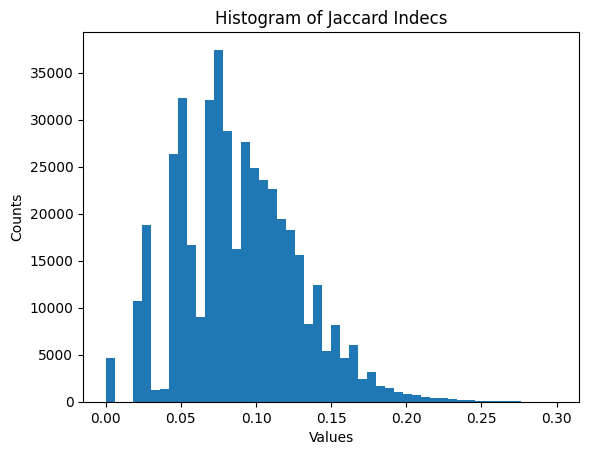

CPU times: total: 9.11 s
Wall time: 11.5 s


In [54]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

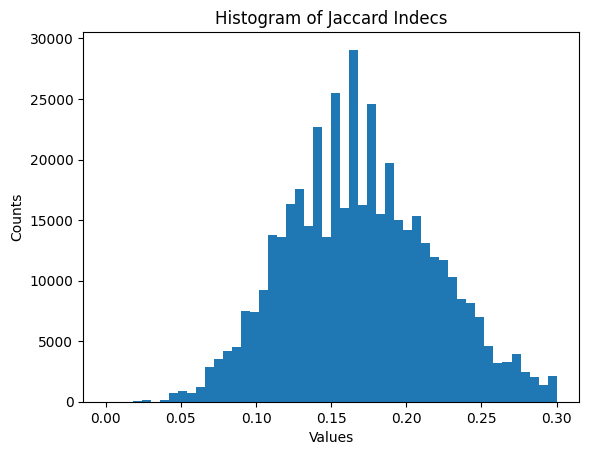

CPU times: total: 9.11 s
Wall time: 10.1 s


In [55]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

For eucledian distance

In [56]:
protected, lemma, replaced, all_words = nlp_utils.get_stat(word_dict_2)
print(f'Protected: {protected}\tLemmatized: {lemma}\t Replaced: {replaced}\t All: {all_words}')

Protected: 135	Lemmatized: 936	 Replaced: 1221	 All: 3314


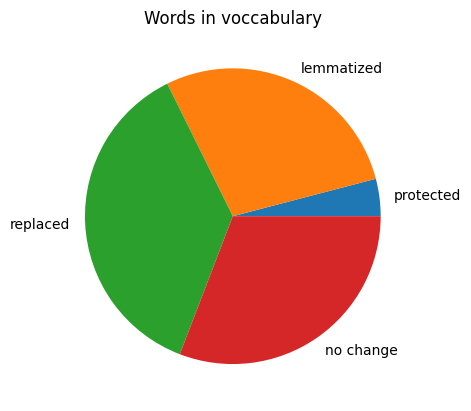

In [57]:
y = np.array([protected, lemma, replaced, (all_words - protected - lemma - replaced)])
mylabels = ['protected', 'lemmatized', 'replaced', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in voccabulary')
plt.show()

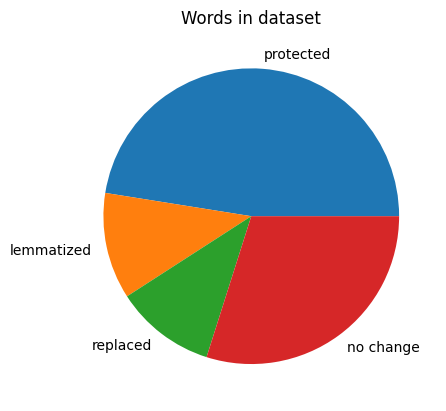

In [58]:
y = np.array([df_2['num_protected'].sum(), df_2['num_lemmatized'].sum(), df_2['num_replaced'].sum(), df_2['num_no_change'].sum()])
mylabels = ['protected', 'lemmatized', 'replaced', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

## 4) Force anonymity

### Get anonymity degree

Before replacement

In [59]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 944 	number of all documents: 946


After replacement

In [60]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 944 	number of all documents: 946


### Steps:
1. Finding k nearest neighbors using approximate nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

In [61]:
anonym_utils.delete_uncommon_words(['I love choco', 'I love banana'])


['I love *', 'I love *']

In [62]:
anonym_utils.force_anonym_using_annoy(['I love choco', 'I love banana', 'lalala'], k=2)

Start: get_anonym_degree: 1
similar_doc_ind [0, 1]
Breaking after moving over 2 of all 3 indexes.
unused_indexes: [2]
End: get_anonym_degree: 1


(['I love *', 'I love *', '*'], [[0, 1]])

In [63]:
force_anon_txt_annoy, neighbor_list = anonym_utils.force_anonym_using_annoy(df_2['anon_txt'], k=2)
anonym_utils.get_anonym_degree(force_anon_txt_annoy)

Start: get_anonym_degree: 1
similar_doc_ind [0, 298]
similar_doc_ind [1, 187]
similar_doc_ind [2, 754]
similar_doc_ind [3, 246]
similar_doc_ind [4, 366]
similar_doc_ind [5, 6]
similar_doc_ind [7, 307]
similar_doc_ind [8, 597]
similar_doc_ind [9, 798]
similar_doc_ind [10, 12]
similar_doc_ind [11, 125]
similar_doc_ind [13, 183]
similar_doc_ind [14, 118]
similar_doc_ind [15, 819]
similar_doc_ind [16, 231]
similar_doc_ind [17, 907]
similar_doc_ind [18, 385]
similar_doc_ind [19, 855]
similar_doc_ind [20, 108]
similar_doc_ind [21, 886]
similar_doc_ind [22, 508]
similar_doc_ind [23, 784]
similar_doc_ind [24, 557]
similar_doc_ind [25, 372]
similar_doc_ind [26, 140]
similar_doc_ind [27, 148]
similar_doc_ind [28, 517]
similar_doc_ind [29, 77]
similar_doc_ind [30, 81]
similar_doc_ind [31, 159]
similar_doc_ind [32, 34]
similar_doc_ind [33, 176]
similar_doc_ind [35, 620]
similar_doc_ind [36, 615]
similar_doc_ind [37, 827]
similar_doc_ind [38, 455]
similar_doc_ind [39, 265]
similar_doc_ind [40, 780]

(1, [[705], [698], [60], [89], [108], [20]])

In [64]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(force_anon_txt_annoy)
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 6 	number of all documents: 946


In [65]:
df_2['force_anon_txt'] = force_anon_txt_annoy
df_2 = anonym_utils.add_neighbor_list_to_df(df_2, neighbor_list)
# Counting the number of words and *
df_2['num_of_words_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\w+', x)))
df_2['num_of_deleting_after_forcing'] = df_2['force_anon_txt'].apply(lambda x: len(re.findall(r'\*', x)))


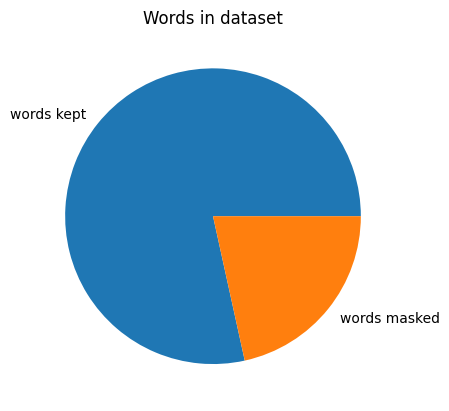

In [66]:
y = np.array([df_2['num_of_words_after_forcing'].sum(), df_2['num_of_deleting_after_forcing'].sum()])
mylabels = ['words kept', 'words masked']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

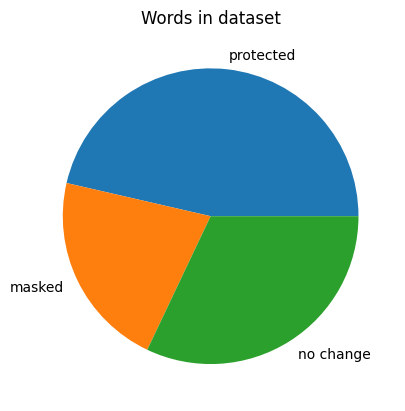

In [67]:
y = np.array([df_2['num_protected'].sum(), df_2['num_of_deleting_after_forcing'].sum(), (df_2['num_of_words_after_forcing'] - df_2['num_protected']).sum()])
mylabels = ['protected', 'masked', 'no change']

plt.pie(y, labels = mylabels)
plt.title('Words in dataset')
plt.show()

In [68]:
i = 1
print(df_2['txt'][i])
print(df_2['anon_txt_history'][i])
print(df_2['force_anon_txt'][i])

just awful: this was possibly the worst book i have ever read. i am amazed by the number of fans for this kind of rubbish.
(just) [worse] (this) (was) [there] (the) {bad} book (i) (have) ever read. (i) (am) {amaze} (by) (the) number (of) {fan} (for) (this) kind (of) rubbish. 
just worse : this was there the there book i have ever read . i am * by the * of * for this * of * .


## 5) Utilization tests

In [69]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2, ['txt', 'anon_txt', 'force_anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,num_replaced,num_lemmatized,num_protected,num_no_change,force_anon_txt,neigbors,num_of_words_after_forcing,num_of_deleting_after_forcing,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred,force_anon_txt_vader_sentiment_pred
0,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...",1,6,11,4,"* ! : these * are not the "" original "" version...","[0, 298]",18,5,0.0000,-0.1957,-0.1957
1,461,just awful: this was possibly the worst book i...,0,25,just worse : this was there the there book i h...,(just) [worse] (this) (was) [there] (the) {bad...,2,3,14,6,just worse : this was there the there book i h...,"[1, 187]",20,5,-0.5574,0.4019,-0.4767
2,493,no lessons learned: this is one of the most di...,0,23,no lesson speak : this is one of the most pred...,(no) {lesson} {learn} (this) (is) one (of) (th...,2,4,10,7,no lesson speak : this is one of * most predic...,"[2, 754]",17,7,-0.5563,-0.0258,-0.2960
3,578,squeem: i ordered according to the size chart ...,0,21,squeem : i order accord to the size chart for ...,squeem: (i) {order} {accord} (to) (the) size c...,1,4,10,6,* : i order * to the size * for my * and it wa...,"[3, 246]",17,5,0.0000,0.0000,0.0000
4,595,"pass: the sizes run really small, it flips up ...",0,25,"pass : the size there there small , it bag up ...","pass: (the) {size} [there] [there] small, (it)...",5,5,11,4,"pass : the * there there * , it bag up even th...","[4, 366]",21,5,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,20710,excellent: prompt delivery. correct parts. you...,1,24,excellent : prompt delivery . correct secret ....,excellent: prompt delivery. correct {part} (yo...,2,5,9,8,excellent : * * . * secret . you can not do * ...,"[892, 941]",20,5,0.8622,0.8070,0.8070
942,20711,purchased minn kota mkp 3 prop from amazon.com...,1,25,purchase minn kota mkp 3 prop from amazon.com ...,{purchase} minn kota mkp 3 prop (from) amazon....,2,4,11,8,* * * * 3 * from *.* . : the * was there what ...,"[874, 942]",16,10,0.0000,0.0000,0.0000
943,20738,plantronics bluetooth 665 charger: this charge...,1,28,plantronic bluetooth 665 charger : this charge...,{plantronic} bluetooth 665 charger: (this) cha...,1,2,13,12,* * * * : this * is great for take when you do...,"[859, 943]",20,9,0.7841,0.7841,0.7841
944,20784,video purchase: like the movie so i bought it....,1,18,video purchase : there the movie so i free it ...,video purchase: [there] (the) movie (so) (i) {...,2,2,7,7,* purchase : there the movie so i free it . re...,"[110, 944]",15,3,0.8655,0.9088,0.8534


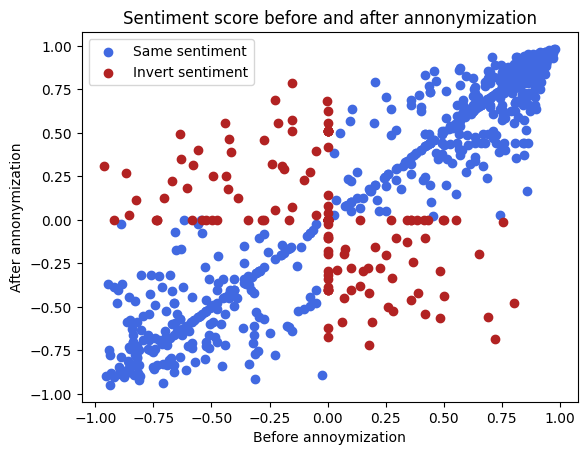

In [70]:
utilization_utils.plot_sentiment_scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])

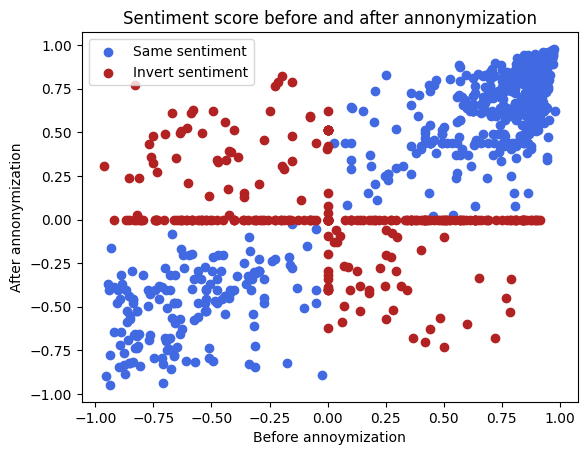

In [71]:
#plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])
utilization_utils.plot_sentiment_scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])


### Using Naive Bayes

In [72]:
utilization_utils.sentiment_test(df_2, 'txt')

0.8858246688505911

In [73]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

0.8689022219057114

The fully anonymized text gets he highest accuracy score!

In [74]:
utilization_utils.sentiment_test(df_2, 'force_anon_txt')

0.8244908132744624

### Using XGBoost

In [75]:
utilization_utils.sentiment_test(df_2, 'txt')

0.8858246688505911

In [76]:
utilization_utils.sentiment_test(df_2, 'anon_txt')

0.8689022219057114

In [77]:
utilization_utils.sentiment_test(df_2, 'force_anon_txt')

0.8244908132744624

## Saving output

In [78]:
filename = 'outputs/' + output_name
df_2.to_csv(filename, index=False)

### Temp and tries

In [79]:
print(nlp_utils.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [80]:
len(nlp_utils.stopwords.words('english'))

179

In [81]:
len(nlp_utils.stopword_list)

344

In [83]:
# nlp_utils.add_word_list_to_stop_words('data/1000_most_common_words.txt')
len(nlp_utils.stopword_list)

344

## TESTING - TEMP

In [84]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

In [85]:
from utils import anonym_utils, nlp_utils
nlp_utils.init_stopwords(None)

temp_docs = ['I love chocolate', 'I love banana', 'I love margarina', 'banana', 'milk', 'chocolate', 'hummus']
temp_vecs, temp_voc = anonym_utils.get_bow(temp_docs)
temp_vecs = temp_vecs.toarray()
print(temp_voc)
print(temp_vecs)

annoy_tree = anonym_utils.build_annoy_search_tree(temp_vecs)
nn = anonym_utils.get_k_unused_items(item=[1,0,0,1,0,0], annoy_tree=annoy_tree, used_items=[1, 3], k=2)
print(nn)

['banana' 'chocolate' 'hummus' 'love' 'margarina' 'milk']
[[0 1 0 1 0 0]
 [1 0 0 1 0 0]
 [0 0 0 1 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]]
[0, 2]
